In [4]:
import tensorflow as tf
# tf.compat.v1.disable_eager_execution() #可以用于从TensorFlow 1.x到2.x的复杂迁移项目的程序开头
import numpy as np
import matplotlib.pyplot as plt

In [5]:
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
#矩阵相乘
product = tf.matmul(m1,m2)
print(product)

Tensor("MatMul_6:0", shape=(1, 1), dtype=int32)


In [6]:
#定义一个会话有默认的图
# tf.compat.v1.disable_eager_execution() #可以用于从TensorFlow 1.x到2.x的复杂迁移项目的程序开头
sess = tf.compat.v1.Session()
result = sess.run(product)#3个op
print(result)
sess.close()

[[15]]


In [22]:
#定义一个会话有默认的图
tf.compat.v1.disable_eager_execution() #可以用于从TensorFlow 1.x到2.x的复杂迁移项目的程序开头
sess = tf.compat.v1.Session()
with tf.compat.v1.Session() as sess:
    result = sess.run(product)#3个op
    print(result)

[[15]]


In [29]:
x = tf.Variable([1,2])
a = tf.constant([3,3])
sub = tf.subtract(x,a)
add = tf.add(x,sub)
tf.compat.v1.disable_eager_execution() #可以用于从TensorFlow 1.x到2.x的复杂迁移项目的程序开头
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[-1  1]


In [49]:
state = tf.Variable(0,name='conunter')#一个变量初始化未0
new_value = tf.add(state,1)#自加1
update = tf.compat.v1.assign(state,new_value)
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


In [52]:
#fetch
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)

add = tf.add(input2,input3)
mul = tf.multiply(input1,add)
tf.compat.v1.disable_eager_execution() #可以用于从TensorFlow 1.x到2.x的复杂迁移项目的程序开头

with tf.compat.v1.Session() as sess:
    result = sess.run([mul,add])
    print(result)

[21.0, 7.0]


In [57]:
#feed
#创建占用符
input1 = tf.compat.v1.placeholder(tf.float32)
input2 = tf.compat.v1.placeholder(tf.float32)
output = tf.multiply(input1,input2)

with tf.compat.v1.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.]}))

[14.]


In [66]:
#简单实验案例
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2

#构造线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data + b

#二次代价函数的定义
loss = tf.reduce_mean(tf.square(y_data-y))#插值的平方
#定义一个梯度下降法来进行训练的优化器
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.2)
#最小优化代价函数
train = optimizer.minimize(loss)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if(step%20 == 0):
            print(step,sess.run([k,b]))


0 [0.054697216, 0.100474715]
20 [0.10418303, 0.1977128]
40 [0.10249382, 0.19863646]
60 [0.10148676, 0.1991871]
80 [0.10088637, 0.19951536]
100 [0.10052842, 0.19971107]
120 [0.10031502, 0.19982776]
140 [0.100187816, 0.1998973]
160 [0.10011196, 0.19993879]
180 [0.10006676, 0.1999635]
200 [0.100039795, 0.19997823]


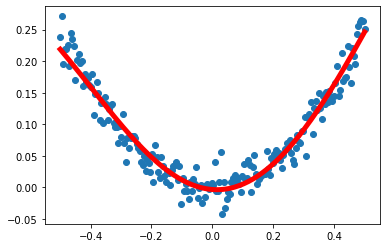

In [3]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #可以用于从TensorFlow 1.x到2.x的复杂迁移项目的程序开头
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

x = tf.compat.v1.placeholder(tf.float32,[None,1])
y = tf.compat.v1.placeholder(tf.float32,[None,1])

#神经网络中间层
Weights_L1 = tf.Variable(tf.compat.v1.random.normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#神经网络输出层
Weights_L2 = tf.Variable(tf.compat.v1.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#梯度下降法训练
train_step = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

In [9]:
x

<tf.Tensor 'Placeholder:0' shape=(None, 1) dtype=float32>